In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
corpus = []
with open("input.txt", "r") as f:
    for line in f:
        corpus.append(line.strip())


In [3]:
# b. Generate training data (CBOW representation)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(corpus)
X, y = [], []

for seq in sequences:
    for i, target_word in enumerate(seq):
        for j in range(max(0, i - 2), min(i + 3, len(seq))):
            if i != j:
                X.append([target_word, seq[j]])
                y.append(1)  # Positive context
                X.append([target_word, np.random.choice(list(word_index.values()))])
                y.append(0)

X = np.array(X)
y = np.array(y)

In [4]:
# c. Train model
model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=1, input_length=2),
    GlobalAveragePooling1D(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=100, verbose=0)
model.summary()

D:\Anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 2, 1)                │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 1)                   │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 398 (1.56 KB)

 Trainable params: 132 (528.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 266 (1.04 KB)

In [5]:
import warnings

In [6]:
# d. Output
word_embeddings = model.layers[0].get_weights()[0]
for word, index in word_index.items():
    print(f"{word}: {word_embeddings[index]}")

and: [0.53633165]
the: [0.48775697]
blockchain: [0.30855367]
data: [0.50296736]
of: [0.45521718]
as: [0.37539932]
a: [0.359549]
is: [0.4532098]
its: [0.20823798]
to: [0.37365532]
management: [0.19452615]
in: [0.45309955]
technology: [0.13480149]
for: [0.12882595]
healthcare: [0.31180838]
can: [0.11931746]
decentralized: [-0.02052018]
applications: [0.20835835]
supply: [0.05405523]
chain: [-0.01393894]
reducing: [-0.01980741]
has: [0.00613877]
emerged: [-0.18028346]
groundbreaking: [0.05595758]
innovation: [-0.0046547]
transforming: [-0.38288838]
way: [-0.41262123]
recorded: [-0.07758658]
verified: [-0.18593551]
secured: [0.10172649]
at: [-0.4109325]
core: [-0.12719588]
ledger: [-0.19084014]
comprising: [-0.20330574]
network: [-0.4290235]
interconnected: [-0.06402979]
nodes: [-0.16058095]
that: [-0.19173826]
validate: [-0.17342472]
timestamp: [-0.1641279]
transactions: [-0.22360584]
this: [-0.05091572]
distributed: [0.11517327]
architecture: [-0.2555694]
ensures: [-0.05132817]
integrity

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

target_word = 'bitcoin'
target_embedding = word_embeddings[tokenizer.word_index[target_word]]

similarities = cosine_similarity(target_embedding.reshape(1, -1), word_embeddings)[0]
most_similar_indices = similarities.argsort()[-5:][::-1]
    
most_similar_words = [word for word, idx in tokenizer.word_index.items() if idx in most_similar_indices]

print(f"Most similar words to '{target_word}': {most_similar_words}")

Most similar words to 'bitcoin': ['resistant', 'tampering', 'censorship', 'bitcoin', 'modern']


In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

# a. Data preparation
corpus = []
with open("input.txt", "r") as f:
    for line in f:
        corpus.append(line.strip())

# b. Generate training data (CBOW representation)
window_size = 2  # Context window size
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
index_word = {index: word for word, index in word_index.items()}

sequences = tokenizer.texts_to_sequences(corpus)
X, y = [], []

for seq in sequences:
    for i, target_word in enumerate(seq):
        context_words = [seq[j] for j in range(max(0, i - window_size), min(i + window_size + 1, len(seq))) if j != i]
        if context_words:
            X.append(context_words)
            y.append(target_word)

# Pad context words (for consistent input length)
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=2*window_size)
y = np.array(y)

# Convert target words to categorical format
y = to_categorical(y, num_classes=len(word_index) + 1)

# c. Train model
model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=50, input_length=2 * window_size),
    GlobalAveragePooling1D(),
    Dense(len(word_index) + 1, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=10, verbose=1)
model.summary()

# d. Output
word_embeddings = model.layers[0].get_weights()[0]

# d. Output
word_embeddings = model.layers[0].get_weights()[0]
for word, index in word_index.items():
    print(f"{word}: {word_embeddings[index]}")

# Example of finding similar words based on cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

target_word = 'bitcoin'
if target_word in tokenizer.word_index:
    target_embedding = word_embeddings[tokenizer.word_index[target_word]]

    similarities = cosine_similarity(target_embedding.reshape(1, -1), word_embeddings)[0]
    most_similar_indices = similarities.argsort()[-6:][::-1]  # Top 5, including the word itself
    
    most_similar_words = [index_word[i] for i in most_similar_indices if i in index_word and i != tokenizer.word_index[target_word]]
    
    print(f"Most similar words to '{target_word}': {most_similar_words}")
else:
    print(f"'{target_word}' not found in the vocabulary.")


Epoch 1/10


D:\Anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0050 - loss: 4.8676      
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0578 - loss: 4.8584 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1747 - loss: 4.8485 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2196 - loss: 4.8409 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2547 - loss: 4.8337 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3120 - loss: 4.8232 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2835 - loss: 4.8154 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3127 - loss: 4.8068 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2962 - loss: 4.7994 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3222 - loss: 4.7853 


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 4, 50)               │           6,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ (None, 50)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 130)                 │           6,630 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,392 (153.88 KB)

 Trainable params: 13,130 (51.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,262 (102.59 KB)

and: [-0.07545649 -0.0123379  -0.02323415 -0.01760146  0.05300781  0.07982273
  0.04921249  0.00678492  0.04125566 -0.0215711  -0.03069209  0.00828196
 -0.01675801 -0.01749349  0.04027573 -0.01975349 -0.03020694 -0.10199723
  0.00412309 -0.0389785  -0.01145683 -0.00707084  0.01717886 -0.02053667
 -0.02070307  0.0695725  -0.00604269  0.05868435 -0.00138006 -0.06077643
  0.00675429 -0.04154284  0.0610004  -0.00356177  0.02429201  0.02650333
 -0.03099073  0.0509175   0.05018862 -0.06449834  0.05008587  0.06417515
 -0.03709276  0.00836172 -0.0032025  -0.02310265 -0.01269212  0.01289253
 -0.01554538 -0.01626601]
the: [ 0.02858587  0.04129647 -0.02651848 -0.00248506  0.00992275 -0.04010884
  0.02938782  0.01273551  0.05989029  0.03402678  0.01476263 -0.09052748
  0.00484699  0.05646892  0.03551721  0.00515211 -0.01352649 -0.01731199
 -0.06733887 -0.00182714 -0.01955306 -0.01236817 -0.02103143 -0.01138622
 -0.0758804  -0.02260697 -0.07881368 -0.01200402 -0.04562538 -0.00676102
 -0.00074481  0

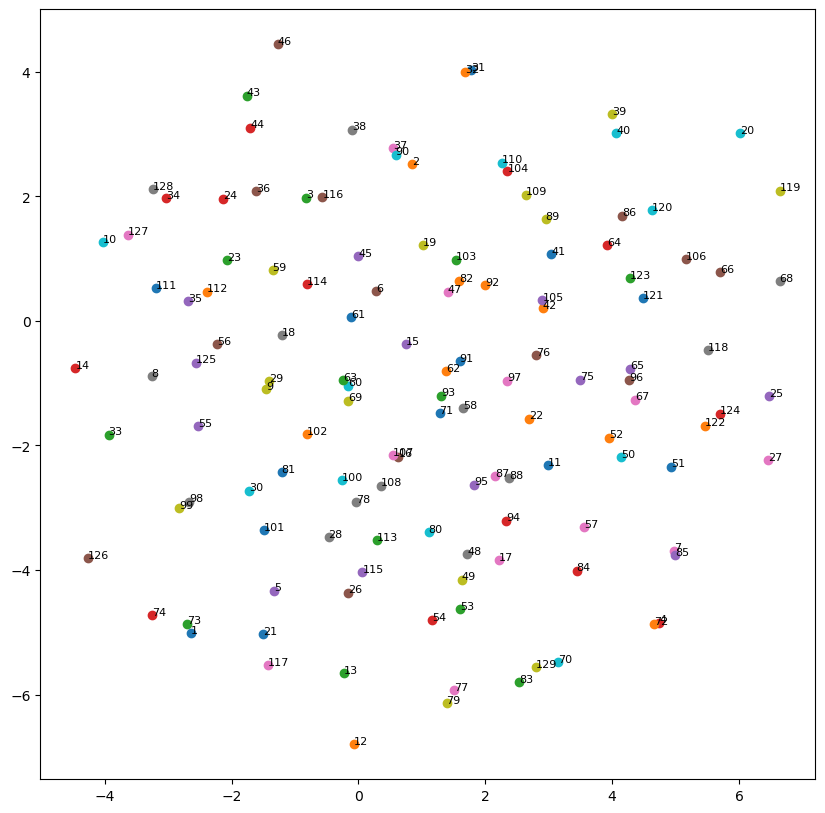

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2)
reduced_embeddings = tsne.fit_transform(word_embeddings)

plt.figure(figsize=(10, 10))
for i, word in enumerate(index_word):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], word, fontsize=8)
plt.show()


In [ ]:
t-SNE:
t-SNE is a dimensionality reduction technique used to map high-dimensional data (in this case, the word embeddings) into two or three dimensions for visualization.
Word embeddings are typically high-dimensional vectors (e.g., 50, 100, or 300 dimensions), and t-SNE tries to preserve the relative distances between words in the reduced space while making the data easier to visualize.
Graph Explanation:
X and Y Axes: The reduced_embeddings array represents the 2D coordinates of each word after applying t-SNE. The axes in the 2D plot represent these coordinates.
Points (Scatter Plot): Each word from the index_word dictionary is represented by a point in the plot. These points are placed based on the relationship of the word's embedding with others in the high-dimensional space.
Text Annotations: The word associated with each embedding is displayed next to its corresponding point on the plot. This helps you identify which word each point represents.
Key Takeaways from the Graph:
Clusters: Words with similar meanings or contexts will tend to group together. For example, synonyms or words frequently used in the same contexts (e.g., "dog", "cat", "animal") will likely appear close to each other in the plot.
Outliers: Words that are very different or infrequent in the corpus may appear far away from the rest of the words.
Word Relationships: You can visually inspect relationships between words. For example, words related to "technology" might form one cluster, and "sports" another.
Use Case:
This plot can give you insights into the quality of your word embeddings by showing how well the model has captured semantic similarities. Words that are similar or related in meaning will cluster together, while unrelated words will be spread out.